In [12]:
from __future__ import print_function
from sklearn import metrics
from sklearn import tree

In [13]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('../Data-processed/Fertilizer_Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
models = []

In [17]:
data.shape

(99, 9)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [19]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [20]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [21]:
data.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [22]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [23]:
x = data.drop('Fertilizer', axis=1)

y = data['Fertilizer']

In [24]:
x.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,Sandy,Maize,37,0,0
1,29,52,45,Loamy,Sugarcane,12,0,36
2,34,65,62,Black,Cotton,7,9,30
3,32,62,34,Red,Tobacco,22,0,20
4,28,54,46,Clayey,Paddy,35,0,0


In [25]:
y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer, dtype: object

In [26]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [27]:

#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [28]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type


,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [29]:
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [30]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2, random_state=0)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))


Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


Decision Tree

In [31]:
# Decision Tree init
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred_dt = model.predict(x_test)
y_pred_dt



array([1, 0, 1, 4, 2, 6, 6, 6, 2, 4, 5, 0, 2, 4, 6, 4, 5, 3, 1, 4])

In [32]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

x = metrics.accuracy_score(y_test,y_pred_dt)
acc.append(x)
models.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test,y_pred_dt))


Accuracy: 0.9
DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.75      0.86         4
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.88        20
weighted avg       0.97      0.90      0.92        20



Logistic Regression

In [33]:

#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.3,random_state=16)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))



Shape of Splitting :
x_train = (69, 8), y_train = (69,), x_test = (30, 8), y_test = (30,)


In [34]:
#Import LR model
from sklearn.linear_model import LogisticRegression
#Create a svm Classifier
clf = LogisticRegression(random_state=16)
#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_lr = clf.predict(x_test)

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

x = metrics.accuracy_score(y_test, y_pred_lr)
acc.append(x)
models.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test,y_pred_lr))

Logistic Regression's Accuracy is:  0.9333333333333333
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         9
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.86        30
weighted avg       0.98      0.93      0.93        30



Support Vector Machine

In [36]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.3,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))


Shape of Splitting :
x_train = (69, 8), y_train = (69,), x_test = (30, 8), y_test = (30,)


In [37]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test)


In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

x = metrics.accuracy_score(y_test, y_pred_svm)
acc.append(x)
models.append('SVM')
print("SVM's Accuracy is: ", x)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test,y_pred_svm))

SVM's Accuracy is:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         8

    accuracy                           0.97        30
   macro avg       0.95      0.95      0.94        30
weighted avg       0.98      0.97      0.97        30



Naive Bayes

In [39]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.3,random_state=33)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))



Shape of Splitting :
x_train = (69, 8), y_train = (69,), x_test = (30, 8), y_test = (30,)


In [40]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_nb = gnb.predict(x_test)


In [41]:
x = metrics.accuracy_score(y_test,y_pred_nb)
acc.append(x)
models.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,y_pred_nb))

Naive Bayes's Accuracy is:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.71      1.00      0.83         5
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.87        30
   macro avg       0.74      0.86      0.79        30
weighted avg       0.79      0.87      0.82        30



Random Forest

In [42]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.3,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))


Shape of Splitting :
x_train = (69, 8), y_train = (69,), x_test = (30, 8), y_test = (30,)


In [43]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=50,max_depth=16, random_state=0)

rand.fit(x_train,y_train)
y_pred_rf = rand.predict(x_test)
x = metrics.accuracy_score(y_test,y_pred_rf)
acc.append(x)
models.append('RF')
print("RF's Accuracy is: ", x)
print(classification_report(y_test,y_pred_rf))

RF's Accuracy is:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         2
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         8

    accuracy                           0.93        30
   macro avg       0.92      0.90      0.88        30
weighted avg       0.95      0.93      0.92        30



<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

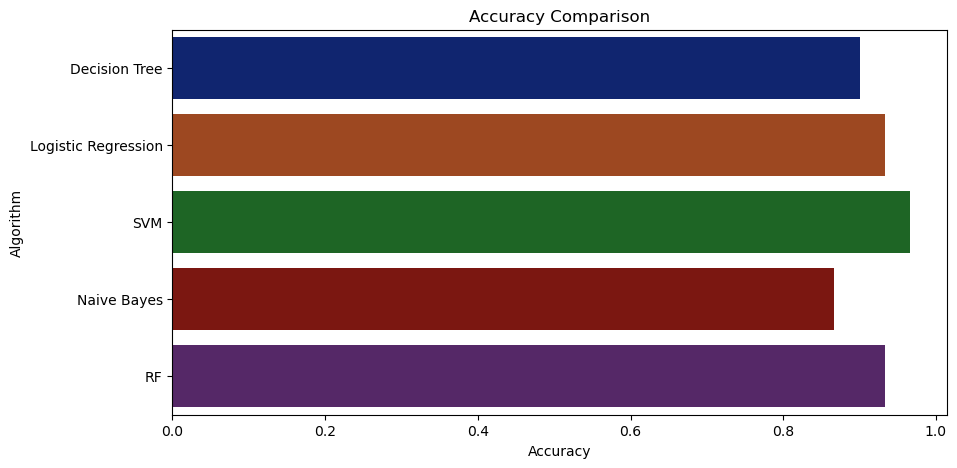

In [44]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models,palette='dark')

In [45]:
print('Model Accuracy:')
accuracy_models = dict(zip(models, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)

Model Accuracy:
Decision Tree --> 90.0
Logistic Regression --> 93.33333333333333
SVM --> 96.66666666666667
Naive Bayes --> 86.66666666666667
RF --> 93.33333333333333


In [47]:

import pickle
# Dump the trained SVM classifier with Pickle
SVMFerti_pkl_filename = '../models/SVM_Fertilizer.pkl'
# Open the file to save as pkl file
SVMFerti_Model_pkl = open(SVMFerti_pkl_filename, 'wb')
pickle.dump(clf, SVMFerti_Model_pkl)
# Close the pickle instances
SVMFerti_Model_pkl.close()

In [48]:
import pickle
# Dump the encoded target fertilizer with Pickle
TargetFerti_pkl_filename = '../models/Ferti_Target.pkl'
# Open the file to save as pkl file
TargetFerti_pkl = open(TargetFerti_pkl_filename, 'wb')
pickle.dump(encode_ferti, TargetFerti_pkl)
# Close the pickle instances
TargetFerti_pkl.close()
